# HR ATTRITION PREDICTION

# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# Loading the data from our dataset

In [2]:
data=pd.read_csv("C:\\Users\\Sathish\\Downloads\\HR_Attrition_Data (1).csv")

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Data Cleaning: Handling Null values

In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# DATA VISUALIZATION

# COUNT PLOT FOR Attrition

Text(0, 0.5, 'Count')

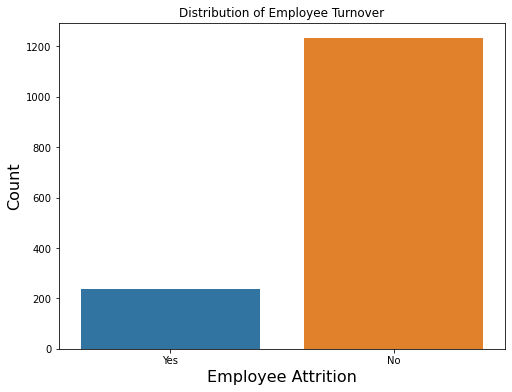

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x='Attrition',data=data)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Attrition', fontsize=16)
plt.ylabel('Count', fontsize=16)

# INSIGHTS
We can clearly see that Dataset in Imbalanced(84% No , 16% Yes).

# DISTRIBUTION PLOT for Age

C:\Users\Sathish\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


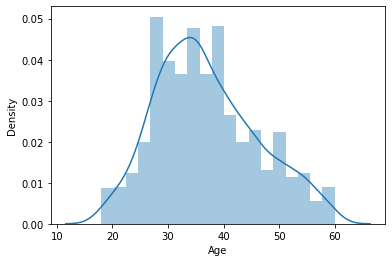

In [6]:
sns.distplot(data['Age']);

# INSIGHTS
Age is fairly normally distributed with average Age around 35. Most of the employees in the range 25 to 45

# DISTRIBUTION PLOT for Monthly Income

C:\Users\Sathish\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


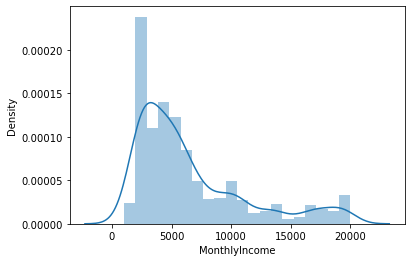

In [7]:
sns.distplot(data['MonthlyIncome']);

# INSIGHTS
Most the employees have their monthly income around 5000$ and is distribution Rightly Skewed.

# STRIP PLOT for BusinessTravel vs Age having hue (Categorized based on) as Attrition

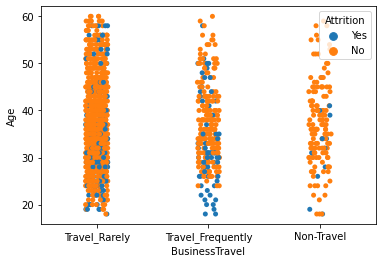

In [8]:
sns.stripplot(x='BusinessTravel',y='Age',data=data,hue='Attrition');

# INSIGHTS
The above stripplot categorizes the attrition of the people based on business Travel and plots the datas of people with attrition in blue and people with no attrition in orange.


# SWARMPLOT for Attrition vs MonthlyRate

C:\Users\Sathish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


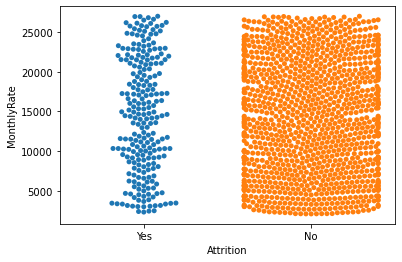

In [9]:
sns.swarmplot(x='Attrition',y='MonthlyRate',data=data);

# INSIGHTS
A swarmplot shows all the data points and that helps to understand the distribution in a better manner. From the above plot we can understand how the data is distributed across a categorical attribute(Attrition) and how the continuous variable(MonthlyRate) is varying within a category(Yes or No).

# VIOLIN PLOT for EducationField vs YearsAtCompany have hue (categorized based on) as Attrition

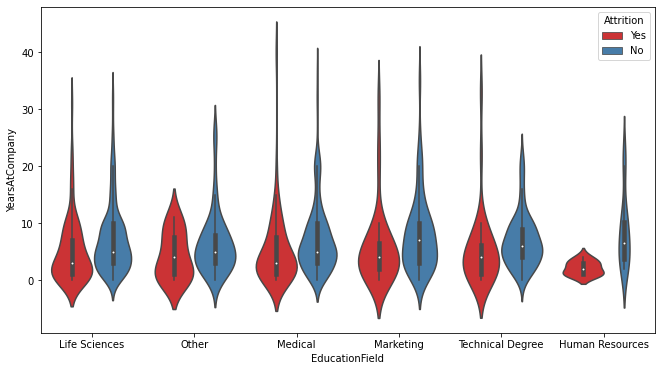

In [10]:
plt.figure(figsize=(11,6))
sns.violinplot(x='EducationField', y="YearsAtCompany", data=data,hue='Attrition',split=False,palette='Set1');

# INSIGHTS
The above violin plot shows the attritions of people based on Educationfield and helps us to know the densities of the people with attrition value Yes and No having education field as independent variable and years at company as dependent variable.  

# Kernel Density Estimate (KDE) PLOTS

In [11]:
def kdePlot(var):
    fig = plt.figure(figsize=(15,4))
    ax=sns.kdeplot(data.loc[(data['Attrition'] == 'No'),var] , color='b',shade=True,label='no Attrition') 
    ax=sns.kdeplot(data.loc[(data['Attrition'] == 'Yes'),var] , color='r',shade=True, label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))

In [12]:
numerical_df=data.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(numerical_df.columns)
remove_columns=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber',
'EnvironmentSatisfaction' ,'HourlyRate','JobInvolvement','JobSatisfaction','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion']
for l in remove_columns:
    numeric_cols_kdeplot.remove(l)

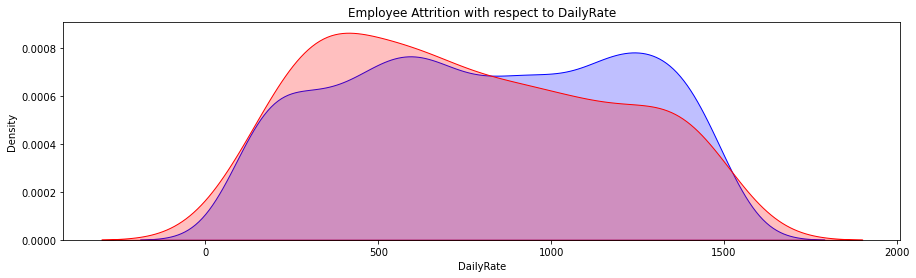

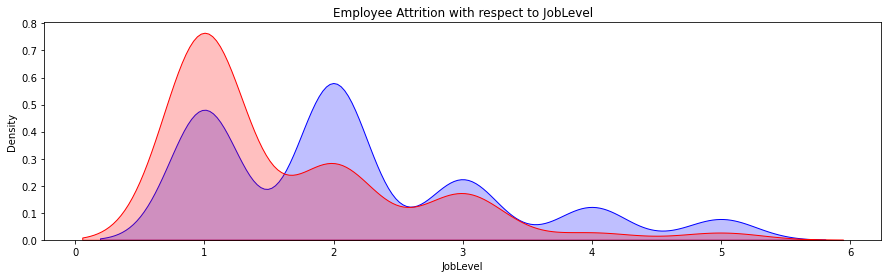

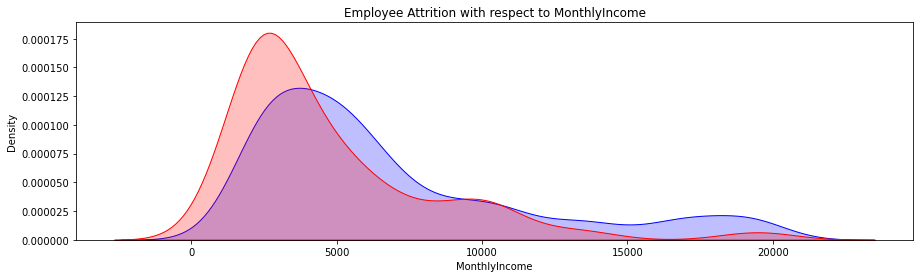

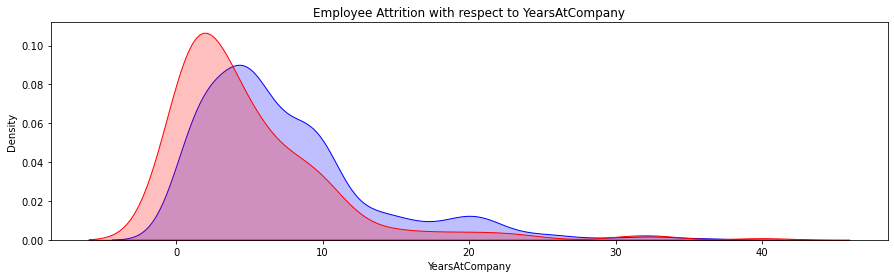

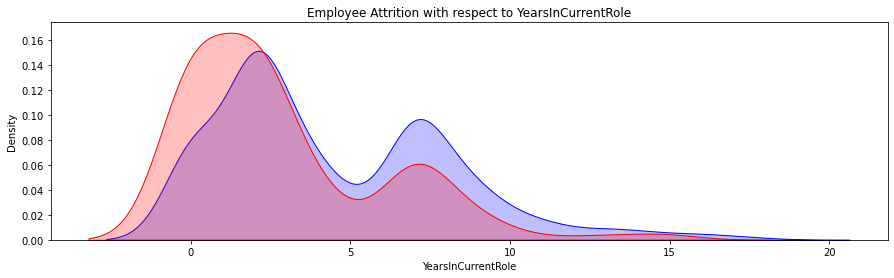

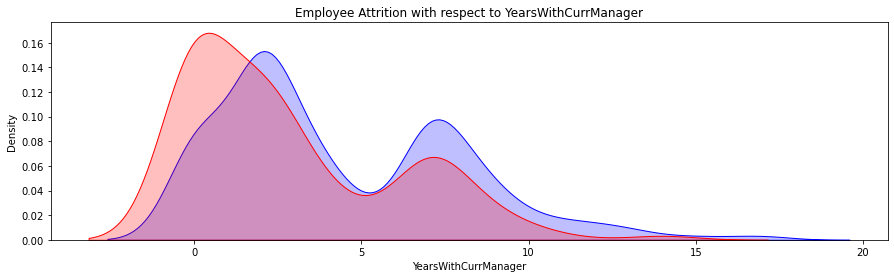

In [13]:
for n in numeric_cols_kdeplot:
    kdePlot(n)

# INSIGHTS
From the above graphs we find that,

Attrition is high with Employees having joblevel as 1.

Employees whose monthly income is below $5000 have high attrition.

Employees who worked in the company around 0 to 1 years have high attrition.

Employees who are in current role for around 0 to 4 years have high attrition.

# BARPLOTS

In [14]:
BarPlot_columns=['Age','DistanceFromHome','EducationField',
                'JobInvolvement','JobLevel','JobRole','OverTime','TotalWorkingYears','TrainingTimesLastYear',
                'WorkLifeBalance','YearsInCurrentRole']

In [15]:
def Bar_plots(var):
    col=pd.crosstab(data[var],data.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)

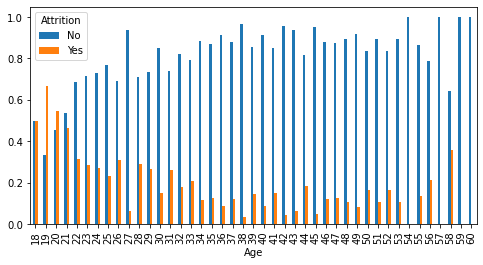

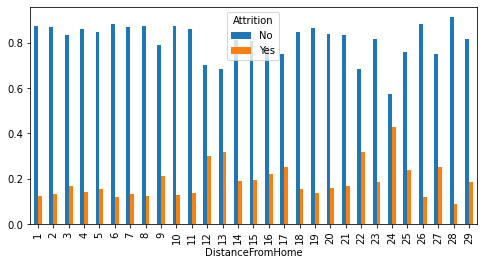

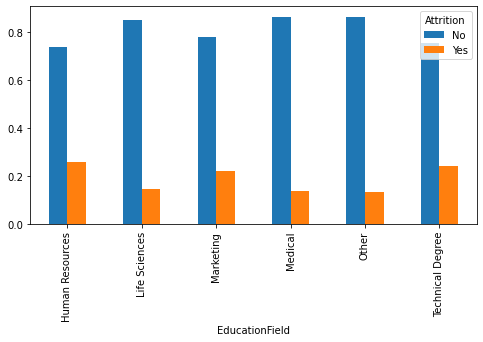

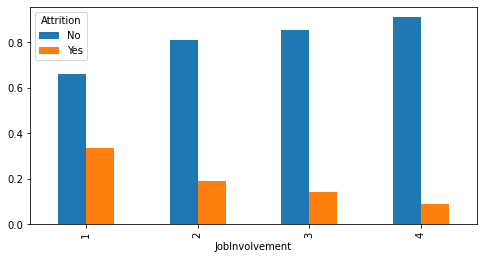

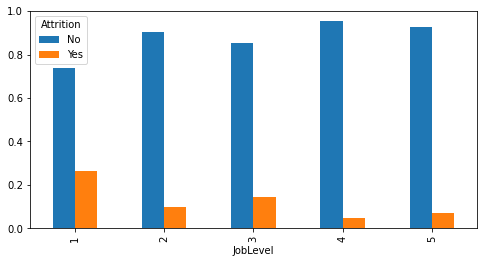

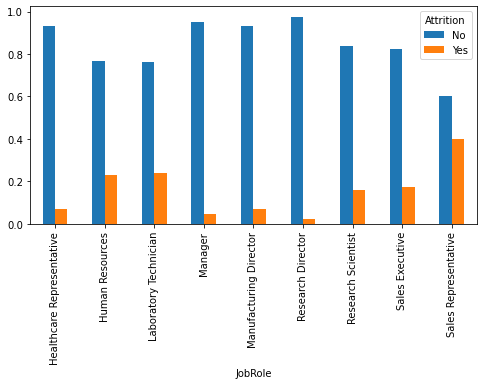

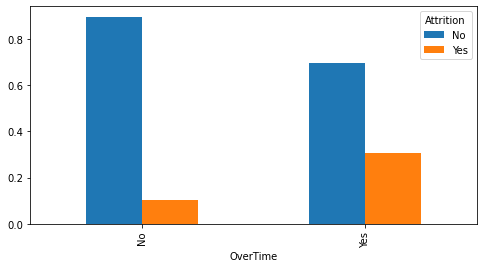

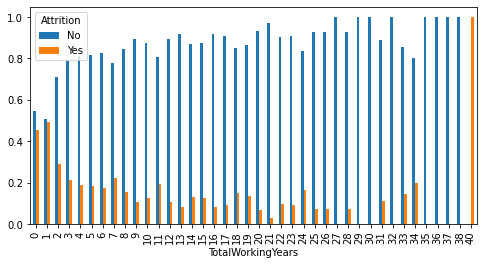

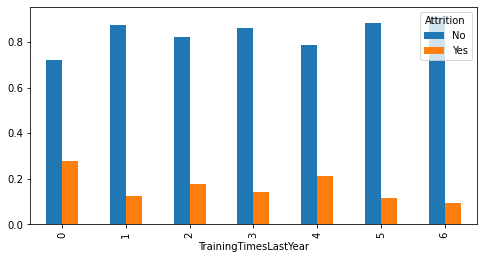

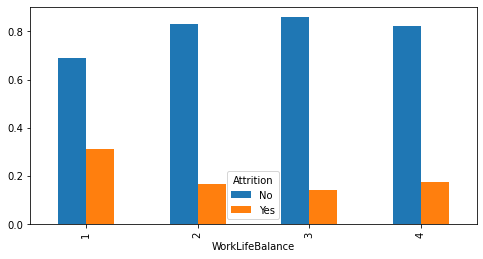

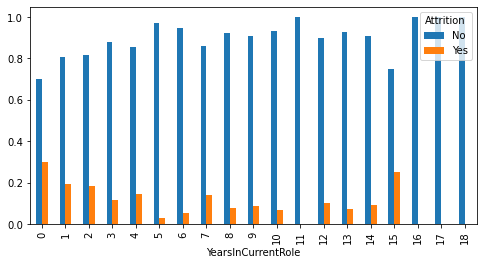

In [16]:
for col in BarPlot_columns:
    Bar_plots(col)

# INSIGHTS
From the above graphs we find that,

Attrition is very high with employees having age in between 18 to 22. 

Attrition is more when the distance of office is more from home

Attrition is high with employee's education in the field of Human Resources, Marketing and Technical Degree that other fields

Attrition is high with employee's whose job role is in the field of Human Resources, Sales Representative, Laboratory Technician.

Employees who work over time have high attrition than employees who did not do over time

Employees who are working less than 2 years have more attrition

# From the above visualizations we see that StandardHours, EmployeeCount, EmployeeNumber do not help in building our model so dropping those columns.

In [17]:
data.drop(columns={'StandardHours','EmployeeCount','EmployeeNumber'},inplace=True)

In [18]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


# Splitting of independent(x) and dependent(y) variables

In [19]:
y=data.loc[:,'Attrition']
x=data.drop(columns={'Attrition'})

In [20]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [21]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

# Changing the datas in Over18 and OverTime columns to 1(Yes) and 0(No)

In [22]:
x['Over18']=np.where(x['Over18']=='Y',1,0)
x['OverTime']=np.where(x['OverTime']=='Yes',1,0)

# One Hot Encoding (Using Dummy Variables)

In [23]:
num=x.select_dtypes(include=np.number)
string=x.select_dtypes(exclude=np.number)
string_dummy=pd.get_dummies(x[string.columns])
x=pd.concat([num,string_dummy],axis=1)

In [24]:
x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,...,0,0,1,0,0,0,0,0,1,0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,0,0,1,0,0,1,0


In [25]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

# Feature Scaling (Normalizing the Values)

In [26]:
scaling=MinMaxScaler()
data_scaled = scaling.fit_transform(x)
data_scaled=pd.DataFrame(data_scaled,columns=['Age', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Non-Travel', 'Travel_Frequently','Travel_Rarely', 'Human Resources','Research & Development', 'Sales','Human Resources', 'Life Sciences','Marketing', 'Medical','Other', 'Technical Degree','Female', 'Male', 'Healthcare Representative','Human Resources', 'Laboratory Technician','Manager', 'Manufacturing Director','Research Director', 'Research Scientist','Sales Executive', 'Sales Representative','Divorced', 'Married','Single'])

In [27]:
x=data_scaled

In [28]:
x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.666667,0.157143,1.000000,0.25,1.000000,0.082254,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.500000,0.365784,0.178571,0.00,1.000000,0.171429,0.333333,0.50,0.000000,0.472986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.214286,0.037938,0.107143,0.50,0.333333,0.814286,1.000000,0.25,0.333333,0.270300,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.738095,0.659270,0.035714,0.50,1.000000,0.471429,0.333333,0.25,0.333333,0.230700,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [29]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

# Splitting the dataset into the Training set and Test set

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)

In [31]:
x_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
1097,0.142857,0.177523,0.714286,0.25,0.666667,0.385714,0.333333,0.00,0.000000,0.067773,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
727,0.000000,0.132427,0.142857,0.25,0.333333,0.614286,0.666667,0.00,1.000000,0.002212,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
254,0.261905,0.819613,0.678571,0.25,1.000000,0.214286,0.666667,0.25,1.000000,0.311848,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1175,0.500000,0.279170,0.392857,0.50,1.000000,0.514286,0.666667,0.25,0.333333,0.225698,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1341,0.309524,0.149606,0.678571,0.50,0.333333,0.842857,0.666667,0.25,0.666667,0.167878,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.404762,0.463851,0.964286,0.50,0.333333,0.228571,1.000000,0.25,0.666667,0.126277,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,0.547619,0.246958,0.142857,0.50,0.333333,0.785714,1.000000,0.25,0.333333,0.308636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,0.095238,0.826056,0.071429,0.75,0.666667,0.257143,0.333333,0.00,1.000000,0.097104,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1459,0.261905,0.913386,0.428571,0.25,1.000000,0.228571,0.333333,0.25,0.333333,0.158820,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
y_train

1097     No
727      No
254      No
1175     No
1341     No
       ... 
1130     No
1294     No
860     Yes
1459     No
1126     No
Name: Attrition, Length: 1176, dtype: object

In [33]:
x_test

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
1041,0.238095,0.546886,0.142857,0.50,1.000000,0.771429,0.666667,0.25,0.000000,0.392522,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
184,0.833333,0.702935,0.428571,0.25,1.000000,0.385714,1.000000,0.25,0.000000,0.181201,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1222,0.142857,0.098783,0.750000,0.00,1.000000,0.400000,0.000000,0.00,0.666667,0.028752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67,0.642857,0.885469,0.214286,0.50,0.333333,0.414286,0.666667,0.50,0.000000,0.458926,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
220,0.428571,0.926271,0.142857,0.25,1.000000,0.457143,0.666667,0.25,0.333333,0.258294,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.380952,0.144596,0.035714,0.50,1.000000,0.428571,0.666667,0.25,1.000000,0.277251,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
560,0.380952,0.046528,0.250000,1.00,0.333333,0.028571,0.666667,0.25,0.000000,0.216535,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
945,0.761905,0.873300,0.964286,0.50,1.000000,0.185714,0.666667,0.75,0.000000,0.835756,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
522,0.452381,0.803865,0.321429,0.25,1.000000,0.714286,1.000000,0.00,1.000000,0.193312,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [34]:
y_test

1041     No
184      No
1222    Yes
67       No
220      No
       ... 
567      No
560      No
945      No
522      No
651      No
Name: Attrition, Length: 294, dtype: object

# Training the Logistic Regression model on the Training set

In [35]:
lr=LogisticRegression()

In [36]:
lr.fit(x_train,y_train)

LogisticRegression()

# Using K Fold cross validation to measure accuracy of our Logistic Regression model

In [37]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LogisticRegression(),x,y,cv=cv)

array([0.88435374, 0.8707483 , 0.91836735, 0.90136054, 0.88435374])

# Predicting the Test set results

In [38]:
pred=lr.predict(x_test)

In [39]:
np.array(y_test)

array(['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No

In [40]:
pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'N

# Checking the ACCURACY of our model

In [41]:
cm = confusion_matrix(y_test, pred)
print("CONFUSION MATRIX\n",cm)
print("\nCLASSIFICATION REPORT\n",classification_report(y_test,pred))
print("\nACCURACY SCORE : ",accuracy_score(y_test, pred))

CONFUSION MATRIX
 [[248   7]
 [ 25  14]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

          No       0.91      0.97      0.94       255
         Yes       0.67      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.79      0.67      0.70       294
weighted avg       0.88      0.89      0.88       294


ACCURACY SCORE :  0.891156462585034


# The ACCURACY of the Model is 89.1%

# Exporting the tested model to a pickle file

In [42]:
import pickle
with open('HR_Attrition_prediction.pickle','wb') as f:
    pickle.dump(lr,f)

# Exporting location and column information to a file that will be useful later on in our prediction application

In [43]:
import json
columns = { 'data_columns' : [col.lower() for col in x.columns]}
with open("columnshr.json","w") as f:
    f.write(json.dumps(columns))